# 2장

## 데이터 가져오기

In [1]:
import sys
import sklearn
import numpy as np
import os
import pandas as pd

import tarfile #압축되지 않은 파일
import urllib.request

import matplotlib as mpt
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 사진 설정 미리 해두기
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path) # 현재 작업공간에 dataset/housing 디렉터리를 만들기
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path) # housing.tgz 파일을 다운받기
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path) #tgz파일 같은 디렉터리에 압축을 풀어 csv파일 만들기
    housing_tgz.close()

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()

## 데이터 구조 훑어보기

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

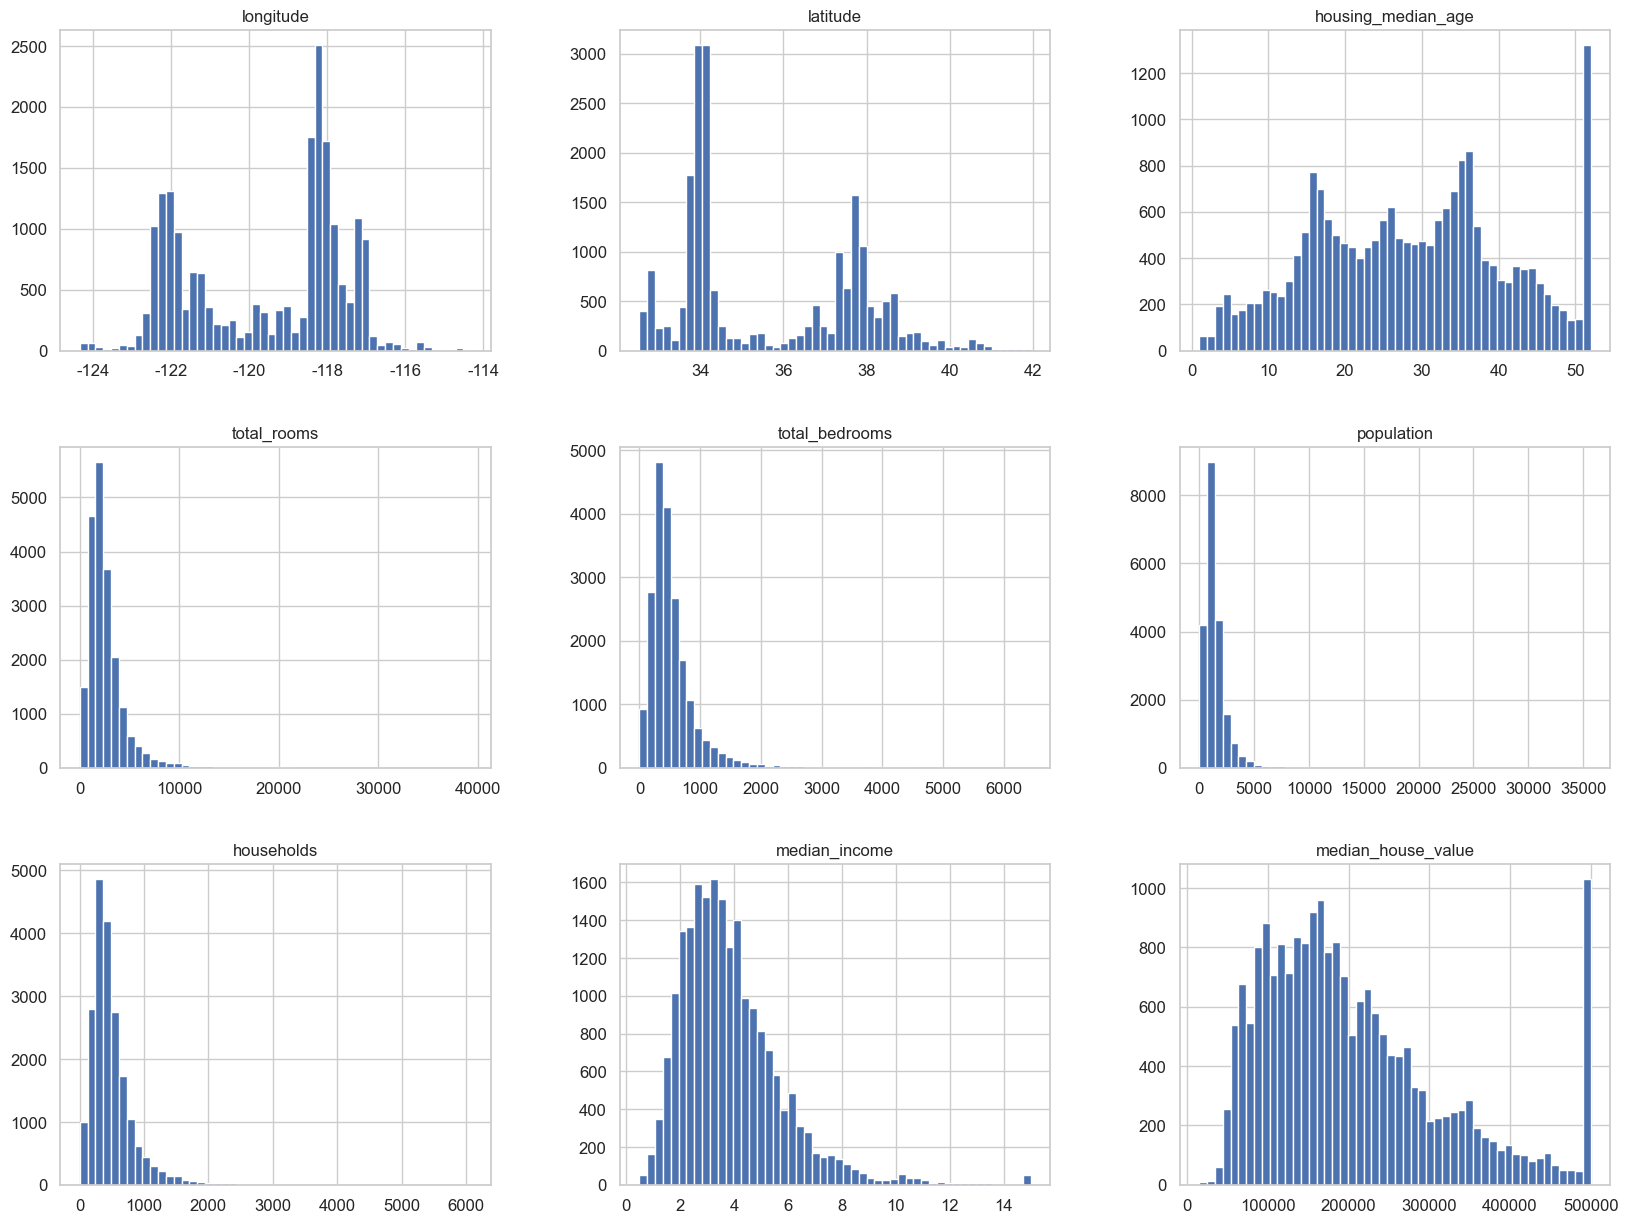

In [10]:
housing.hist(bins=50,figsize=(20,15))

- income 변수를 보면 us 달러를 스케일링 한 값인걸 확인할 수 있다(ex. 3 = 3만달러등등)
- 종속변수인 중간주택가격을 보면 최대,최소값 한정되어있음을 알 수 있다
    - 훈련 및 테스트 세트에서 500000 넘는 값은 제거한다
- 많은 변수들이 오른쪽 꼬리가 긴 분포모양을 가진다 -> 변환시도해볼 수 있음

In [11]:
housing.describe(include="O")

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


## 테스트 셋 만들기

In [12]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing,test_size= 0.2, random_state= 123)

In [13]:
len(train_set) , len(test_set)

(16512, 4128)

In [14]:
# 계층별로 데이터셋에 충분한 샘플 수가 있어야 함
# 안그러면 계층의 중요도를 추정하는데 편향이 발생함
# 중간소득 카테고리 생성하기
housing['income_cat'] = pd.cut(housing['median_income'], bins =[0., 1.5, 3, 4.5, 6, np.inf],
                               labels = [1,2,3,4,5])

In [15]:
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

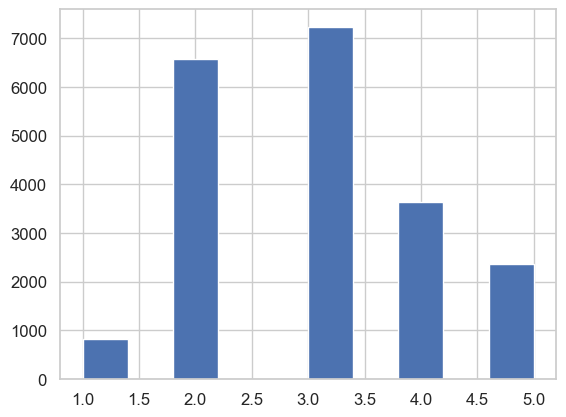

In [16]:
housing['income_cat'].hist()

## 계층 샘플링

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=123)

In [18]:
for train_index , test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [19]:
# 테스트셋의 소득 카테고리의 비율
strat_test_set['income_cat'].value_counts(1)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [20]:
# 전체 데이터셋의 소득 카테고리별 비율을 보면 테스트셋의 소득 카테고리의 비율과 비슷한 걸 확인할 수 있다
housing['income_cat'].value_counts(1)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [21]:
# income_cat 변수는 카테고리화 하여 계층 샘플링을 하기 위한 변수였으므로 삭제하여 원래대로 만들기
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat',axis=1,inplace= True)

In [22]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20198,-119.19,34.26,16.0,5018.0,853.0,2524.0,830.0,5.1752,218000.0,NEAR OCEAN
2092,-119.78,36.75,43.0,2070.0,512.0,1925.0,444.0,1.4635,46600.0,INLAND
16668,-120.69,35.25,15.0,4210.0,899.0,1933.0,867.0,2.7940,262500.0,NEAR OCEAN
10941,-117.88,33.74,29.0,720.0,174.0,1045.0,181.0,3.1964,151900.0,<1H OCEAN
17350,-120.43,34.90,30.0,2388.0,393.0,1117.0,375.0,4.1058,164000.0,<1H OCEAN


In [23]:
# train set을 housing으로 copy하여 복사본 생성하기
housing = strat_train_set.copy()

In [24]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20198,-119.19,34.26,16.0,5018.0,853.0,2524.0,830.0,5.1752,218000.0,NEAR OCEAN
2092,-119.78,36.75,43.0,2070.0,512.0,1925.0,444.0,1.4635,46600.0,INLAND
16668,-120.69,35.25,15.0,4210.0,899.0,1933.0,867.0,2.7940,262500.0,NEAR OCEAN
10941,-117.88,33.74,29.0,720.0,174.0,1045.0,181.0,3.1964,151900.0,<1H OCEAN
17350,-120.43,34.90,30.0,2388.0,393.0,1117.0,375.0,4.1058,164000.0,<1H OCEAN


## 데이터 이해를 위한 탐색과 시각화

### 지리적 데이터 시각화

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

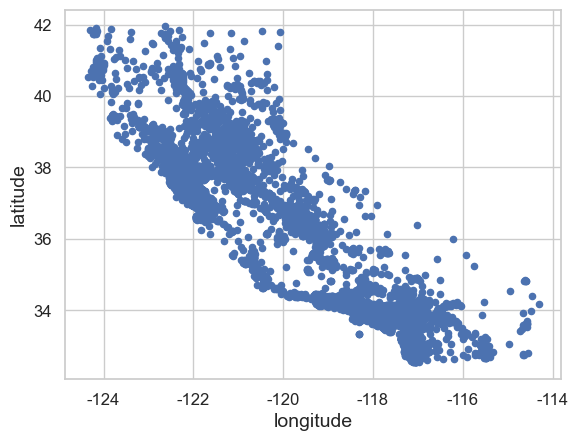

In [25]:
# 위치 데이터가 있으니 모든 구역을 산점도로 만들어보기 
housing.plot(kind='scatter',x='longitude',y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

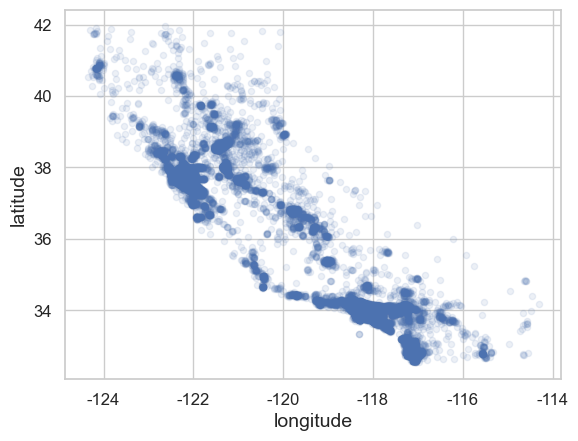

In [26]:
# 옵션을 이용하여 데이터 포인트가 밀집된 영역을 확인해보기
# alpha : 색상의 투명도
housing.plot(kind='scatter',x='longitude',y='latitude', alpha = 0.1)

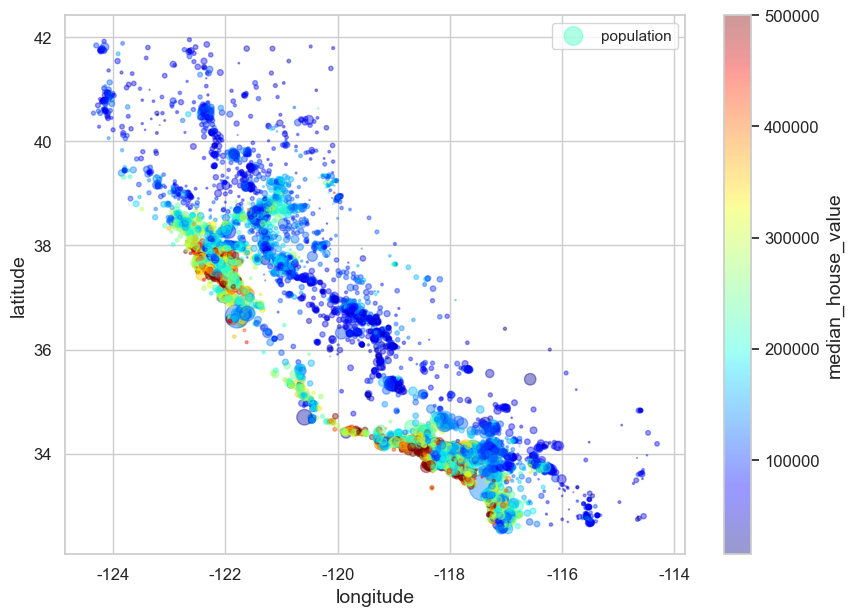

In [27]:
# 반지름(s): 구역의 인구
# 색상(c) : 가격
# 컬러맵 : jet (낮)파란색 ~ (높)빨간색
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False) # x축의 값과 범례를 표시하지 못하는 버그를 수정
plt.legend() #범례 표시하기

- 주택 가격은 지역과 인구밀도와 관련이 있어보인다
- 군집 알고리즘을 통해 주요 군집을 찾아 군집의 중심까지 거리를 잴 수도 있음


## 상관관계 분석

In [28]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924929,-0.112546,0.050895,0.077519,0.104235,0.063589,-0.019127,-0.046091
latitude,-0.924929,1.000000,0.014114,-0.043758,-0.075853,-0.114933,-0.080615,-0.076876,-0.144711
housing_median_age,-0.112546,0.014114,1.000000,-0.359861,-0.318695,-0.292824,-0.301808,-0.114092,0.110918
total_rooms,0.050895,-0.043758,-0.359861,1.000000,0.930001,0.858225,0.918003,0.196081,0.135388
total_bedrooms,0.077519,-0.075853,-0.318695,0.930001,1.000000,0.877517,0.979194,-0.009296,0.050226
population,0.104235,-0.114933,-0.292824,0.858225,0.877517,1.000000,0.907149,0.005613,-0.022426
households,0.063589,-0.080615,-0.301808,0.918003,0.979194,0.907149,1.000000,0.013124,0.067539
median_income,-0.019127,-0.076876,-0.114092,0.196081,-0.009296,0.005613,0.013124,1.000000,0.688825
median_house_value,-0.046091,-0.144711,0.110918,0.135388,0.050226,-0.022426,0.067539,0.688825,1.000000


In [29]:
#중간 주택 가격과 다른 변수간의 상관계수
housing.corr()['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688825
total_rooms           0.135388
housing_median_age    0.110918
households            0.067539
total_bedrooms        0.050226
population           -0.022426
longitude            -0.046091
latitude             -0.144711
Name: median_house_value, dtype: float64

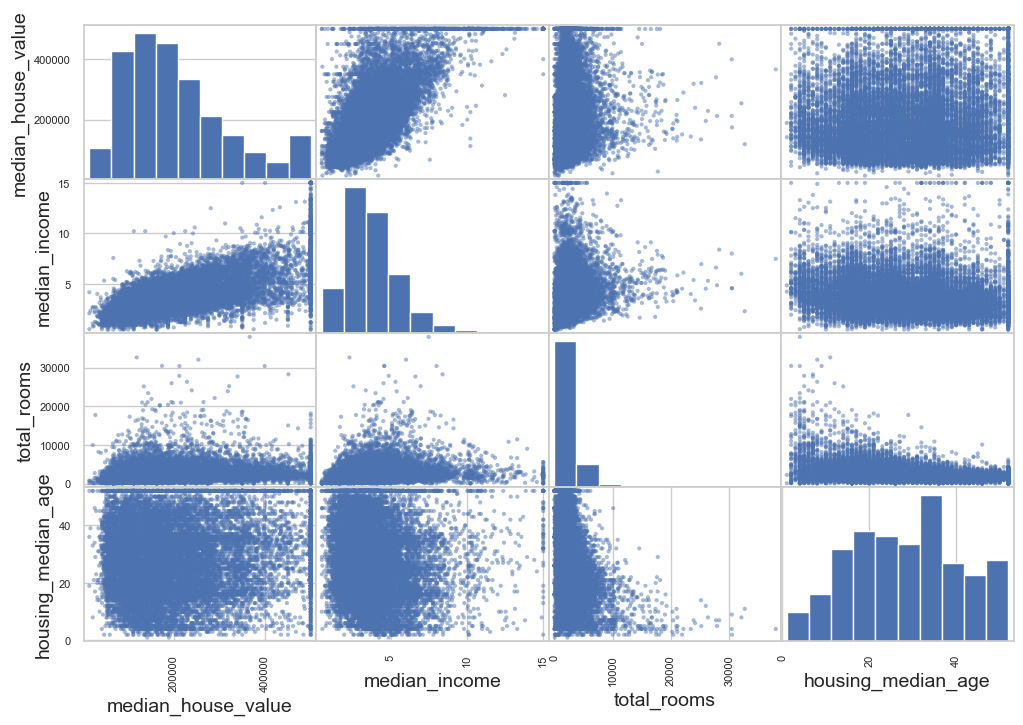

In [32]:
from pandas.plotting import scatter_matrix

# 숫자형 11개를 다 그리면 121개의 그래프이므로 상관관계가 높아보이는 특성만 그려보기
attribute = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attribute],figsize=(12,8));

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

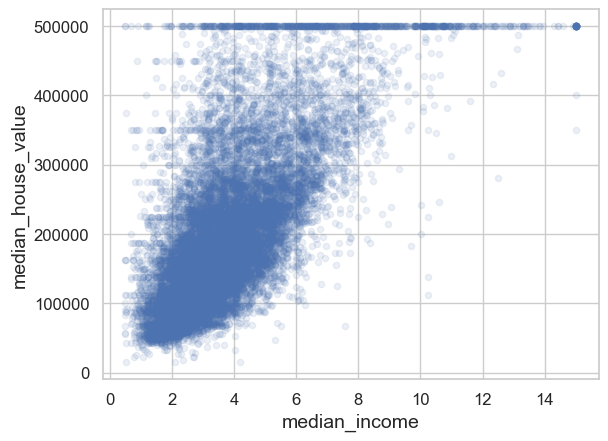

In [31]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

- 가격제한선인 500,000에서 수평선으로 나타남 → 제거해야하나?

## 새로운 특성 생성

In [33]:
# 가구당 방 개수
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
# 방 개수 당 침실 개수
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
# 가구당 인원
housing['population_per_household'] = housing['population']/housing['households']

In [34]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
20198,-119.19,34.26,16.0,5018.0,853.0,2524.0,830.0,5.1752,218000.0,NEAR OCEAN,6.045783,0.169988,3.040964
2092,-119.78,36.75,43.0,2070.0,512.0,1925.0,444.0,1.4635,46600.0,INLAND,4.662162,0.247343,4.335586
16668,-120.69,35.25,15.0,4210.0,899.0,1933.0,867.0,2.7940,262500.0,NEAR OCEAN,4.855825,0.213539,2.229527
10941,-117.88,33.74,29.0,720.0,174.0,1045.0,181.0,3.1964,151900.0,<1H OCEAN,3.977901,0.241667,5.773481
17350,-120.43,34.90,30.0,2388.0,393.0,1117.0,375.0,4.1058,164000.0,<1H OCEAN,6.368000,0.164573,2.978667


In [35]:
#중간 주택 가격과 다른 변수간의 상관계수
housing.corr()['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688825
rooms_per_household         0.145367
total_rooms                 0.135388
housing_median_age          0.110918
households                  0.067539
total_bedrooms              0.050226
population_per_household   -0.022016
population                 -0.022426
longitude                  -0.046091
latitude                   -0.144711
bedrooms_per_room          -0.259627
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='rooms_per_household', ylabel='median_house_value'>

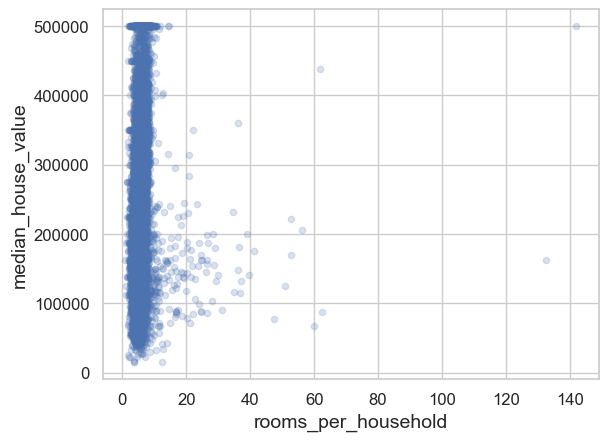

In [36]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)

## 머신러닝 알고리즘을 위한 데이터 준비

In [37]:
housing = strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [ ]:
# total_bedrooms 결측값 제거
housing.dropna(subset=['total_bedrooms'])

In [38]:
# 누락된 값을 특성의 중간값으로 대체
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median') 

In [40]:
# 텍스트인 ocean을 제외한 데이터 복사본을 만들고 적용해보기
housing_num = housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [42]:
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2127.5   ,  435.    , 1165.    ,
        410.    ,    3.5391])

In [44]:
housing_num.median().values

array([-118.5   ,   34.26  ,   29.    , 2127.5   ,  435.    , 1165.    ,
        410.    ,    3.5391])

In [45]:
X = imputer.transform(housing_num)

In [46]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing_num.index)

In [47]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20198,-119.19,34.26,16.0,5018.0,853.0,2524.0,830.0,5.1752
2092,-119.78,36.75,43.0,2070.0,512.0,1925.0,444.0,1.4635
16668,-120.69,35.25,15.0,4210.0,899.0,1933.0,867.0,2.7940
10941,-117.88,33.74,29.0,720.0,174.0,1045.0,181.0,3.1964
17350,-120.43,34.90,30.0,2388.0,393.0,1117.0,375.0,4.1058


## 텍스트와 범주형 특성 다루기

In [49]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
20198,NEAR OCEAN
2092,INLAND
16668,NEAR OCEAN
10941,<1H OCEAN
17350,<1H OCEAN


In [50]:
# 텍스트를 숫자로 변환
# 머신러닝 알고리즘이 가까이 있는 두값이 떨어져있는 두 값보다 더 비슷하다고 생각하게 됨(bad,good,excellent등)
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [51]:
housing_cat_encoded

array([[4.],
       [1.],
       [4.],
       ...,
       [0.],
       [0.],
       [4.]])

In [52]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [53]:
# one-hot encoding, dummy변수(이진변수)
# 결과값: 희소행렬 → 0을 모두 메모리에 저장하는 것은 낭비이므로 0이 아닌 원소의 위치만 저장함
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [54]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [55]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [56]:
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

## 특성 스케일링

In [ ]:
# min-max scaling
# 0~1 범위에 들도록 값을 이동

In [ ]:
# standardization
# 범위에 상한 하한이 없어 어떤 알고리즘에서는 문제가 될 수 있음
# 이상치에 영향을 덜 받는다


## 변환 파이프라인

In [57]:
# 수치형 특성을 전처리하기 위해 파이프라인을 만든다.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # 결측치 중위수로 채우기
        ('attribs_adder', CombinedAttributesAdder()),  
        ('std_scaler', StandardScaler()), # 표준화
    ])

In [58]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 0.19539181, -0.64763895, -1.00104491, ...,  0.23288798,
        -0.00316293, -0.66174655],
       [-0.09835987,  0.51448715,  1.14409463, ..., -0.29784219,
         0.1100634 ,  0.50639107],
       [-0.5514345 , -0.18558882, -1.08049452, ..., -0.223557  ,
        -0.07413038, -0.00408037],
       ...,
       [ 0.72314908, -0.81565719,  0.58794734, ..., -0.13925492,
        -0.03229203, -0.11038437],
       [-1.88078535,  1.7559552 ,  1.38244347, ..., -0.05434233,
        -0.05498056, -0.10141195],
       [ 1.23099097, -1.31971188, -1.00104491, ..., -0.20332691,
        -0.08985189, -0.05257634]])

In [61]:
# 주택 가격데이터에 전체 변환 적용
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num) # 변수명
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [63]:
housing_prepared.shape

(16512, 16)

### 선형 회귀모델

In [67]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [69]:
some_data= housing.iloc[:5]
some_labels= housing_labels.iloc[:5]


In [70]:
some_data_prepared = full_pipeline.transform(some_data)
print("예측:", lin_reg.predict(some_data_prepared))

예측: [280530.00273942  55311.87946976 235094.01555609 168812.68377393
 264281.66155767]


In [71]:
# 실제값과 비교
print("레이블:", list(some_labels))

레이블: [218000.0, 46600.0, 262500.0, 151900.0, 164000.0]


In [72]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68164.22481237905

- 중간 주택 가격대가 대략 120,000~265,000 정도인데
- 예측 오차가 68,164정도 난다는 건 좋은 모델이 아니라는 뜻
- 과소적합

### DecisionTreeRegressor

In [74]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [75]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

- 오차가 0 -> 심하게 과대적합됨

### 교차검증

In [78]:
# k-fold-cross-validation
# fold라 불리는 10개의 서브셋으로 무작위 분할
# 10번 훈련하고 평가하는데 매번 다른 fold 선택해 그걸 평가에 사용하고 남은 9개로 훈련실시
# 총 10개의 평가점수가 담김

# scoring 매개변수에 비용함수가 아닌 효용함수(높을수록 좋음)을 기대함
# 음수값으로 계산뒤에 -를 붙여 부호바꿔줌

In [77]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring = 'neg_mean_squared_error',cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [79]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

display_scores(tree_rmse_scores)

점수: [71147.38460063 68778.39837891 68366.62961816 67572.4299516
 72101.83245697 67634.74213354 71961.05168233 72236.50442358
 72186.61095726 73281.53922344]
평균: 70526.71234264209
표준 편차: 2073.7677186830088


### RandomForestRegressor

In [80]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18574.921917639756

In [82]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [49866.72678598 50434.49232258 46019.42879004 50021.42274785
 50341.35192859 48456.45590693 50524.35795833 50766.2161091
 52726.65253232 51475.71708362]
평균: 50063.2822165336
표준 편차: 1702.5089683743336


### SVM

In [83]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

110617.88431963262

## 모델 세부 튜닝

### 그리드 탐색(GridSearchCV)
- 어떤 하이퍼파라미터 값을 지정해야할 지 모를때는 연속된 10의 거듭제곱 수로 시도해보기
- 더 세밀하게 탐색해보려면 더 작은 값을 지정해보기

In [84]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 12(=3×4)개의 하이퍼파라미터 조합을 시도합니다.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 다섯 개의 폴드로 훈련하면 총 (12+6)*5=90번의 훈련이 일어납니다.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [85]:
# 최상의 파라미터 조합
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [86]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [87]:
# 그리드서치에서 테스트한 하이퍼파라미터 조합의 점수를 확인
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


64256.10442320349 {'max_features': 2, 'n_estimators': 3}
55355.49141079946 {'max_features': 2, 'n_estimators': 10}
52698.39190538189 {'max_features': 2, 'n_estimators': 30}
59538.88892437268 {'max_features': 4, 'n_estimators': 3}
52383.11090561838 {'max_features': 4, 'n_estimators': 10}
49988.10102717238 {'max_features': 4, 'n_estimators': 30}
58878.7764899843 {'max_features': 6, 'n_estimators': 3}
51871.6186633592 {'max_features': 6, 'n_estimators': 10}
49964.943914610485 {'max_features': 6, 'n_estimators': 30}
58370.201631880765 {'max_features': 8, 'n_estimators': 3}
52141.65549827991 {'max_features': 8, 'n_estimators': 10}
49682.783163023574 {'max_features': 8, 'n_estimators': 30}
62396.73477833325 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54149.52549190038 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58770.94084259922 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51960.531503441925 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

### 랜덤탐색(RandomizedSearchCV)
- 하이퍼파라미터 탐색 공간이 커지면 랜덤탐색이 좀 더 유용
- 가능한 모든조합을 시도하기보단 각 반복마다 하이퍼파라미터에 임의의 수를 대입하여 지정한 횟수만큼 평가

In [88]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002469698E850>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002469698E6D0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [89]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48941.18655388787 {'max_features': 7, 'n_estimators': 180}
51081.90952249484 {'max_features': 5, 'n_estimators': 15}
50297.557346663445 {'max_features': 3, 'n_estimators': 72}
50415.15656236937 {'max_features': 5, 'n_estimators': 21}
49047.5393178593 {'max_features': 7, 'n_estimators': 122}
50282.76120141494 {'max_features': 3, 'n_estimators': 75}
50197.44858761593 {'max_features': 3, 'n_estimators': 88}
49174.42508787613 {'max_features': 5, 'n_estimators': 100}
49917.35637559462 {'max_features': 3, 'n_estimators': 150}
65794.35395411136 {'max_features': 5, 'n_estimators': 2}


### 최상의 모델과 오차 분석

In [90]:
# 각 특성의 상대적인 중유도
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.03237645e-02, 6.37086181e-02, 4.25820165e-02, 1.51171655e-02,
       1.49195726e-02, 1.48101510e-02, 1.34395969e-02, 3.70302263e-01,
       6.62436988e-02, 1.05572610e-01, 4.46807601e-02, 8.26441515e-03,
       1.65403876e-01, 8.27499419e-05, 1.60412704e-03, 2.94461516e-03])

In [91]:
# 그에 대응하는 특성 이름
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # 예전 방식
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.37030226308084163, 'median_income'),
 (0.16540387598535108, 'INLAND'),
 (0.10557260959955923, 'pop_per_hhold'),
 (0.07032376445300956, 'longitude'),
 (0.06624369882848825, 'rooms_per_hhold'),
 (0.06370861806634655, 'latitude'),
 (0.044680760147881644, 'bedrooms_per_room'),
 (0.04258201645633775, 'housing_median_age'),
 (0.015117165534671916, 'total_rooms'),
 (0.014919572576509459, 'total_bedrooms'),
 (0.014810151047892588, 'population'),
 (0.01343959693220808, 'households'),
 (0.008264415152303117, '<1H OCEAN'),
 (0.00294461515860163, 'NEAR OCEAN'),
 (0.001604127038112235, 'NEAR BAY'),
 (8.274994188522534e-05, 'ISLAND')]

- 이를 바탕으로 덜 중요한 특성을 제외할 수 있다
- ocean_proximity 카테고리 중 하나만 실제로 유용하므로 다른 카테고리 제외하기

### 테스트 세트로 시스템 평가하기

In [93]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test) #훈련하면 안되니까 fit_transform쓰면 안됨!
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48866.56634025872

In [94]:
# 신뢰구간
from scipy import stats

confidence = 0.95 #일반화 오차의 95% 신뢰구간 계산
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46650.97946736, 50985.96597604])